## 0. 教程大纲

### 0.1 卷积
```python
cv.filter2D(img, -1, kernel)
```

### 0.2 均值模糊
```python
cv.blur(img, (5,5))
cv.boxFilter(img, -1, (5,5))
```

### 0.3 中值滤波
```python
cv.medianBlur(img, 3)
```

### 0.4 高斯模板
```python
cv.GaussianBlur(img, (5,5), sigma)
```

### 0.5 双边滤波
```python
cv.bilateralFilter(img, -1, sigmaColor=50, sigmaSpace=3)
```

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## * 二维高斯分布

$$
G(x,y,\sigma) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

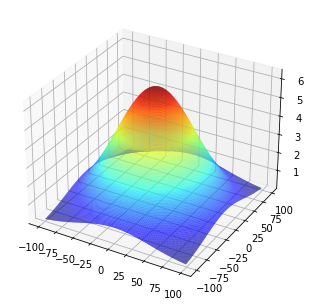

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


sigma = 50

# x,y = np.mgrid[-2:2:0.05,-2:2:0.05]
x,y = np.mgrid[-100:100:1,-100:100:1]

z = 1/(2 * np.pi * (sigma**2)) * np.exp(-(x**2+y**2)/(2 * sigma**2))


fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='jet',alpha = 0.8)

# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.xticks([-2, -1, 0, 1, 2])
# plt.yticks([-2, -1, 0, 1, 2])
plt.show()

## 4 模糊化

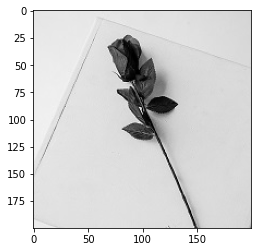

In [6]:
img = cv.imread('pic/rose200x200.jpg', 0)
show(img)

### 4.1 自定义滤波器

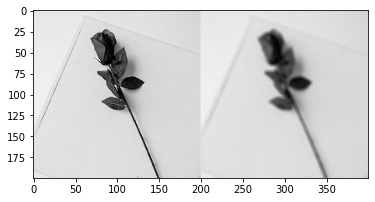

In [7]:
kernel = np.ones((5,5), dtype=np.float32)
kernel /= kernel.sum()

img_filter = cv.filter2D(img, -1, kernel)
show(np.hstack([img, img_filter]))

### 4.2 均值模糊

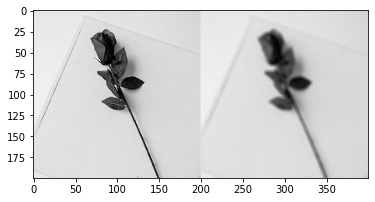

In [8]:
img_mblur = cv.blur(img, (5,5)) #, borderType=cv.BORDER_CONSTANT
show(np.hstack([img, img_mblur]))

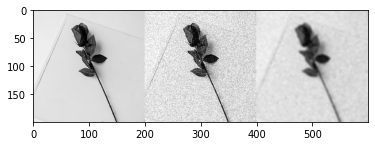

In [9]:
img_gnoise = cv.imread('pic/rose_gaussiannoise_200x200.jpg', 0)
img_mblur = cv.blur(img_gnoise, (5,5)) #, borderType=cv.BORDER_CONSTANT
show(np.hstack([img, img_gnoise, img_mblur]))

In [10]:
cv.imwrite("pic/rose_remove_gnoise.jpg", np.hstack([img, img_gnoise, img_mblur]))

True

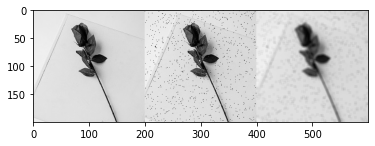

In [11]:
img_spnoise = cv.imread('pic/rose_spnoise_200x200.jpg', 0)
img_mblur = cv.blur(img_spnoise, (5,5)) #, borderType=cv.BORDER_CONSTANT
show(np.hstack([img, img_spnoise, img_mblur]))

In [12]:
cv.imwrite("pic/rose_remove_spnoise.jpg", np.hstack([img, img_spnoise, img_mblur]))

True

### 4.3 Gaussian模糊

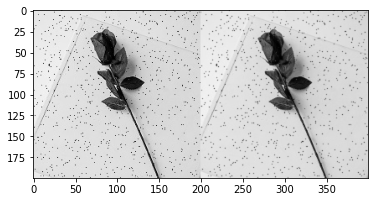

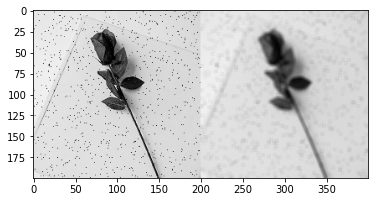

In [13]:
img_gblur1 = cv.GaussianBlur(img_spnoise, (5,5), 0.5)
img_gblur2 = cv.GaussianBlur(img_spnoise, (5,5), 10)
show(np.hstack([img_spnoise, img_gblur1]))
show(np.hstack([img_spnoise, img_gblur2]))

### 4.4 中值模糊

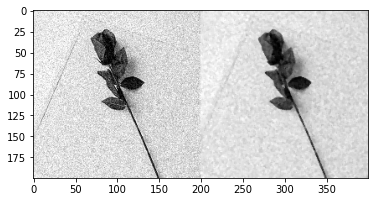

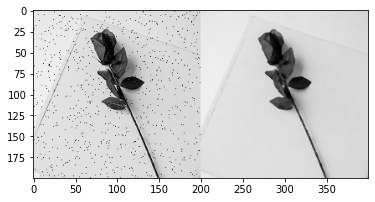

In [14]:
img_blur1 = cv.medianBlur(img_gnoise, 3)
img_blur2 = cv.medianBlur(img_spnoise, 3)
show(np.hstack([img_gnoise, img_blur1]))
show(np.hstack([img_spnoise, img_blur2]))

In [15]:
cv.imwrite("pic/rose_gnoise_median.jpg", np.hstack([img, img_gnoise, img_blur1]))
cv.imwrite("pic/rose_spnoise_median.jpg", np.hstack([img, img_spnoise, img_blur2]))

True

## 附：添加噪声

0


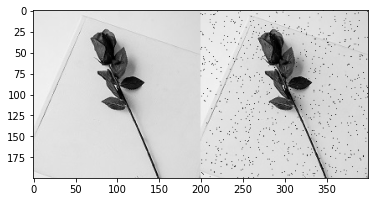

In [17]:
#### 1. 椒盐噪声
def salt_pepper_noise(img, ratio=0.02):
    img = img.copy()
    for _ in range(int(img.size * ratio)):
        i = np.random.randint(0, img.shape[0])
        j = np.random.randint(0, img.shape[1])     
        img[i,j] = np.random.randint(0, 100)
    print(img.min())
    return img

img = cv.imread('pic/rose200x200.jpg', 0)
img_sp = salt_pepper_noise(img)
show(np.hstack([img, img_sp]))

In [18]:
cv.imwrite('pic/rose_spnoise_200x200.jpg', img_sp)

True

In [19]:
def gaussian_noise(img, mean=0, var=20):
    noise = np.random.normal(mean, var, img.shape)
    img = img.astype(np.float) + noise
    return img

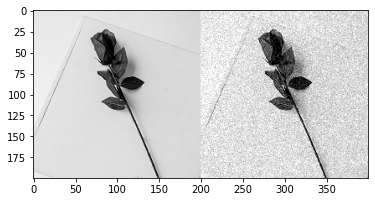

In [23]:
img = cv.imread('pic/rose200x200.jpg', 0)
img_ga = gaussian_noise(img)
show(np.hstack([img, img_ga]))

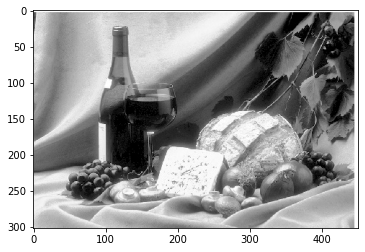

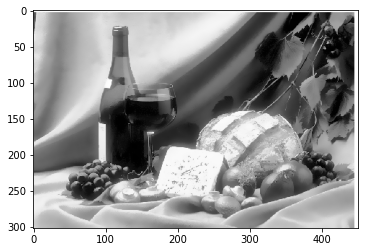

In [30]:
# img = cv.imread('pic/rose_gaussiannoise_200x200.jpg')
img = cv.imread('pic/beer.jpg')

show(img)

img2 = cv.bilateralFilter(img, 11, sigmaColor=50, sigmaSpace=3)
show(img2)

### 双边滤波实现

In [115]:
def get_c(sigmad, n):
    C = np.zeros((n, n))
    center = np.array([n//2, n//2])
    for i in range(n):
        for j in range(n):
            cur = np.array([i, j])
            C[i, j] = np.exp(-0.5 * (
                np.linalg.norm(cur - center)/sigmad
               )**2 
            )
    C /= C.sum()
    return C

def get_s(part, sigmar, n):
    part = np.float64(part)
    S = np.exp(-0.5 * ((part - part[n//2, n//2])/sigmar)**2)
    S /= S.sum()
    return S

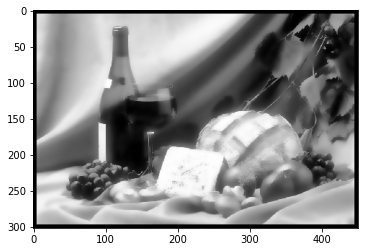

Wall time: 3.01 s


In [116]:
%%time

img = cv.imread('pic/beer.jpg', 0)
img2 = cv.bilateralFilter(img, 11, sigmaColor=50, sigmaSpace=3)

sigmad = 3  # sigmaSpace 
sigmar = 50 # sigmaColor

n = 11

h, w = img.shape
img3 = np.ones_like(img, dtype=np.float64)

C = get_c(sigmad, n)

for i in range(n//2, h-n//2):
    for j in range(n//2, w-n//2):
        part = img[i-n//2:i-n//2+n, j-n//2:j-n//2+n]
        S = get_s(part, sigmar, n)
        K = C * S
        K /= K.sum()
        img3[i, j] = (K * part).sum()
        
# img3 = img3.astype(np.uint8)

show(img3)

In [114]:
img3.dtype

dtype('float64')

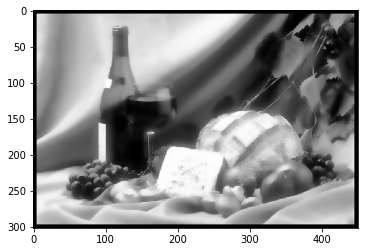

In [113]:
show(img3.astype(np.uint8))

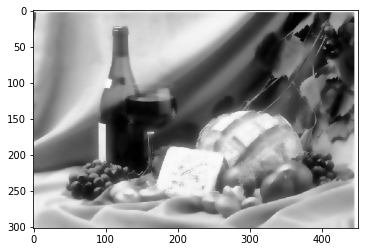

In [102]:
show(img2)

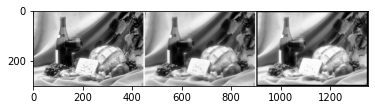

In [101]:
show(np.hstack([img, img2, img3]))

In [108]:
cv.imwrite('test/bilateral_filter.jpg', np.hstack([img, img2, img3]).astype(np.uint8))

True

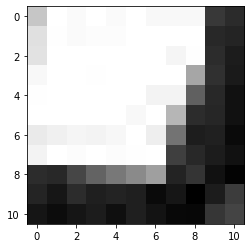

In [74]:
ss = 100
part = img[ss:ss+n, ss:ss+n]
show(part)

In [75]:
part

array([[222, 255, 252, 255, 252, 255, 251, 251, 251, 142, 134],
       [237, 254, 252, 253, 253, 255, 255, 255, 255, 132, 130],
       [238, 255, 255, 255, 255, 255, 255, 249, 254, 135, 125],
       [251, 255, 255, 254, 255, 255, 255, 255, 204, 137, 124],
       [254, 255, 255, 255, 255, 255, 248, 248, 164, 132, 119],
       [255, 255, 255, 255, 255, 251, 255, 213, 135, 131, 119],
       [243, 246, 249, 248, 250, 255, 245, 175, 126, 128, 115],
       [248, 255, 253, 255, 253, 254, 255, 145, 132, 125, 119],
       [135, 132, 149, 166, 178, 188, 200, 129, 139, 119, 111],
       [130, 122, 135, 127, 129, 127, 115, 122, 109, 125, 144],
       [121, 116, 121, 125, 118, 127, 120, 114, 113, 140, 148]],
      dtype=uint8)

In [76]:
part.astype(np.int) - part[5,5]

array([[ -29,    4,    1,    4,    1,    4,    0,    0,    0, -109, -117],
       [ -14,    3,    1,    2,    2,    4,    4,    4,    4, -119, -121],
       [ -13,    4,    4,    4,    4,    4,    4,   -2,    3, -116, -126],
       [   0,    4,    4,    3,    4,    4,    4,    4,  -47, -114, -127],
       [   3,    4,    4,    4,    4,    4,   -3,   -3,  -87, -119, -132],
       [   4,    4,    4,    4,    4,    0,    4,  -38, -116, -120, -132],
       [  -8,   -5,   -2,   -3,   -1,    4,   -6,  -76, -125, -123, -136],
       [  -3,    4,    2,    4,    2,    3,    4, -106, -119, -126, -132],
       [-116, -119, -102,  -85,  -73,  -63,  -51, -122, -112, -132, -140],
       [-121, -129, -116, -124, -122, -124, -136, -129, -142, -126, -107],
       [-130, -135, -130, -126, -133, -124, -131, -137, -138, -111, -103]])

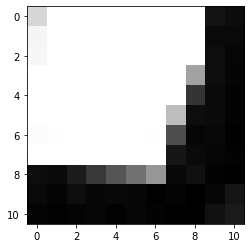

In [77]:
S = get_s(part, sigmar, n=11)
show(S)